# EDA
- This EDA is going to be very short, just to see some tendencies and try to see if there are any kind of repetitive patterns over the years
- Loading the libraries and the data

In [1]:

import pandas as pd
import numpy as np
from DateTime import DateTime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pylab import rcParams
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
import calplot
import pandas_ta as ta
from src.feature import TimeConfig

- Transformation of the data to begin the EDA
- For a matter of effiency, the analisis is going to be only with the Close/Last value
    - If it is necessary, the opening value is going to be added

In [5]:
df_2= pd.read_csv('../artifacts/data_ingestion/apple.csv')

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2517 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [9]:
for f in df_2.columns:
    print(f'{f}:')

Date:
Close/Last:
Volume:
Open:
High:
Low:


In [2]:
df= TimeConfig.process_chain('../Data/apple.csv',['Close/Last'])

In [3]:
df.head(2)

,Value
Date,
2014-05-30,22.6072
2014-06-02,22.4518


- in this Analysis, we can see the change in the value of the price in the last 10 years, the is a considerable change in the scale from 2021 and 2022, lets begin an analysis from 2014, later on iterate over that same proces from 2021,2022 an finally in 2023
We can see that there is a very considerable trend and pattern from 2023, later on we are going to analyze more of those points

- Visualization of all the values from 2014 to 2024

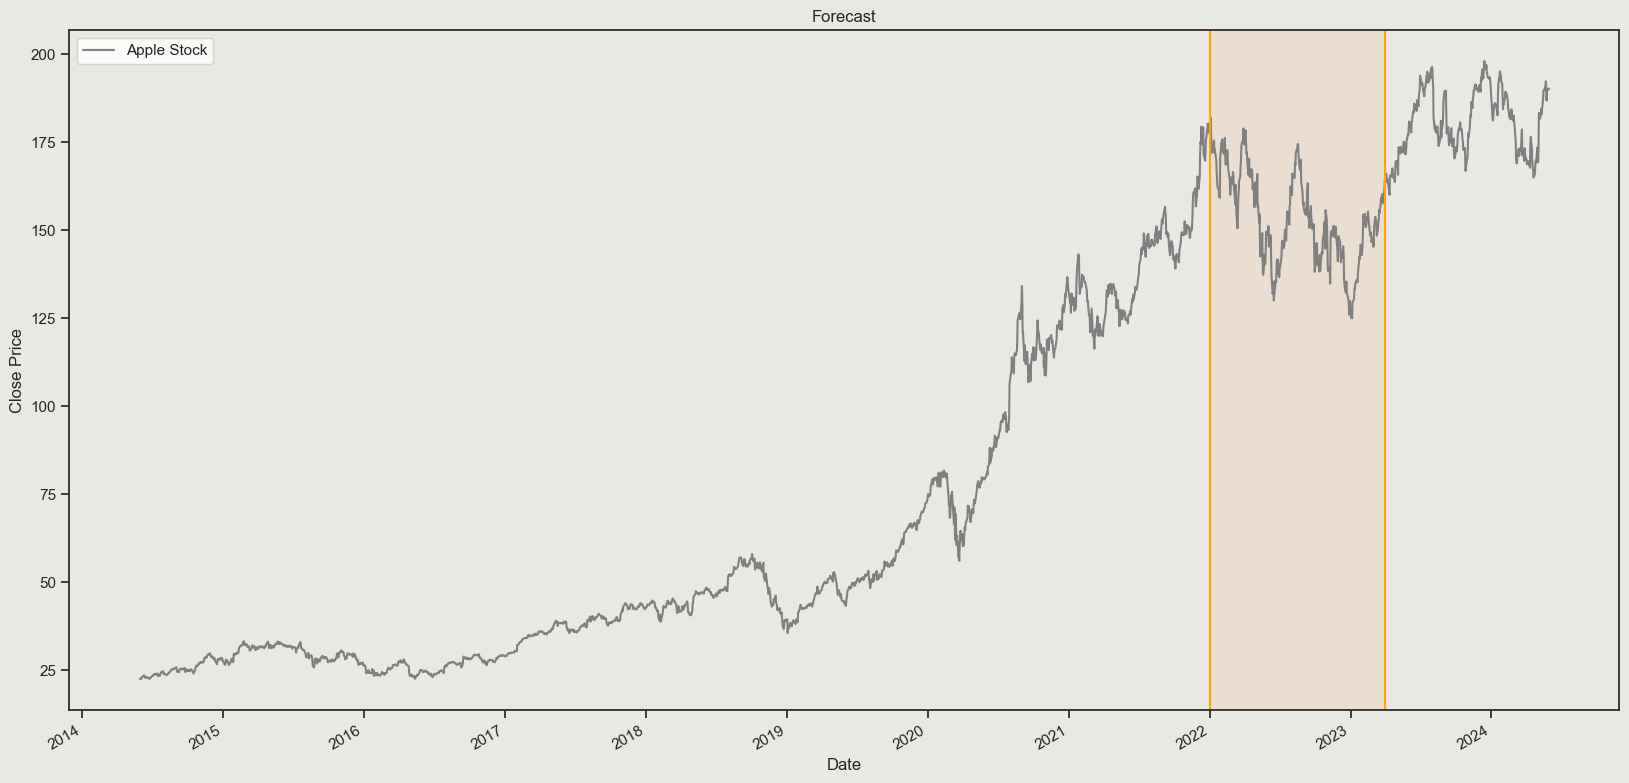

In [3]:
df["Value"].plot(figsize=(20, 10), label="Apple Stock", color= "gray")
plt.axvline(x=pd.to_datetime('2022'),color='orange')
plt.axvline(x=pd.to_datetime('2023-04'),color='orange')
plt.axvspan(pd.to_datetime('2022'),pd.to_datetime('2023-04'),color='#FF8A36',alpha=0.1)
plt.title("Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.gca().set_facecolor('#E8E8E4')  
plt.gcf().set_facecolor('#E8E8E4')
plt.legend(facecolor='#E8E8E4')
plt.legend()
plt.show()


- The data shows different scales in values, with an 8x increase over the last 10 years, though not necessarily at a rate of 1x per year or following any specific trend.
- There is an increase in the variations of the Close value from 2020 onwards, with an increasing trend.
- There is a clear pattern between 2022-2023; further analysis will be conducted.

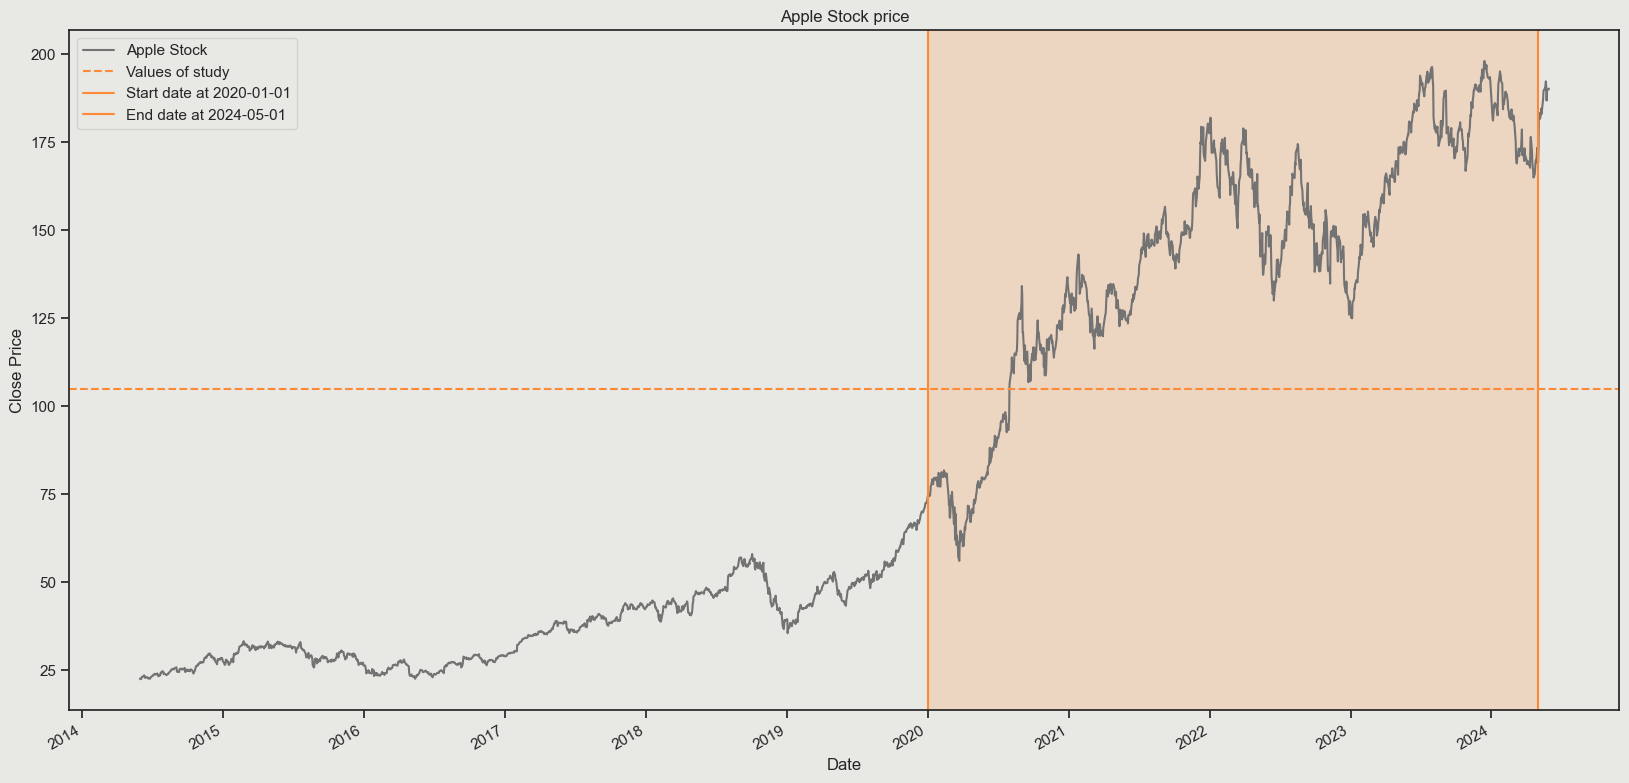

In [4]:
df["Value"].plot(figsize=(20, 10), label="Apple Stock", color= "#737373")                                      # Selection of data
plt.axhline(y=105, color='#FF8A36', linestyle='--', label='Values of study')
plt.axvline(x=pd.to_datetime('2020-01-01'), color='#FF8A36', linestyle='-', label='Start date at 2020-01-01')
plt.axvline(x=pd.to_datetime('2024-05-01'), color='#FF8A36', linestyle='-', label='End date at 2024-05-01')
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2024-05-01'), color='#FF8A36', alpha=0.2)
plt.title("Apple Stock price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.gca().set_facecolor('#E8E8E4')  
plt.gcf().set_facecolor('#E8E8E4')
plt.legend(facecolor='#E8E8E4')
plt.show()

- The scale of the Values are way to different from 2014 to 2020, the analysis is going to be made from 2020-2024 so we can have a more accurate understanding of the actual value
- The horizontal line in the Y axis represents the break in the AVG price of the close value, it is not specific, is just a mere visual help to see the change of the scale

    - Slicing by DatetimeIndex 2020-2025-05-01

In [5]:
data= df.loc['2020':'2024-05-01'].copy()
print(data.head(2))
print(data.tail(2))

              Value
Date               
2020-01-02  75.0875
2020-01-03  74.3575
             Value
Date              
2024-04-30  170.33
2024-05-01  169.30


- Lowest price of "Value" in the historical data from 2020-2024
- Moment where the Vale got at is highest

In [6]:
minimmum= data["Value"].idxmin()
min_value= data.loc[minimmum]
print(min_value)
print(minimmum.day_name())
max_value= data["Value"].idxmax()
max_observation= data.loc[max_value]
print(max_observation)
print(max_value.day_name())

Value    56.0925
Name: 2020-03-23 00:00:00, dtype: float64
Monday
Value    198.11
Name: 2023-12-14 00:00:00, dtype: float64
Thursday


- Time wiindows to analyze the charasteristics of the growth
    - It can be really important to have more information about the relationship of the growth of this data with some sort of external input or sensitivity
    - Further analysis will be conducted regarding news related to this dates
        - After some research, it is really difficult to gather accurate information on the internet about these kind of companies with a 4 years delay, for future explorations from 2024, news sensitivity will be implemented

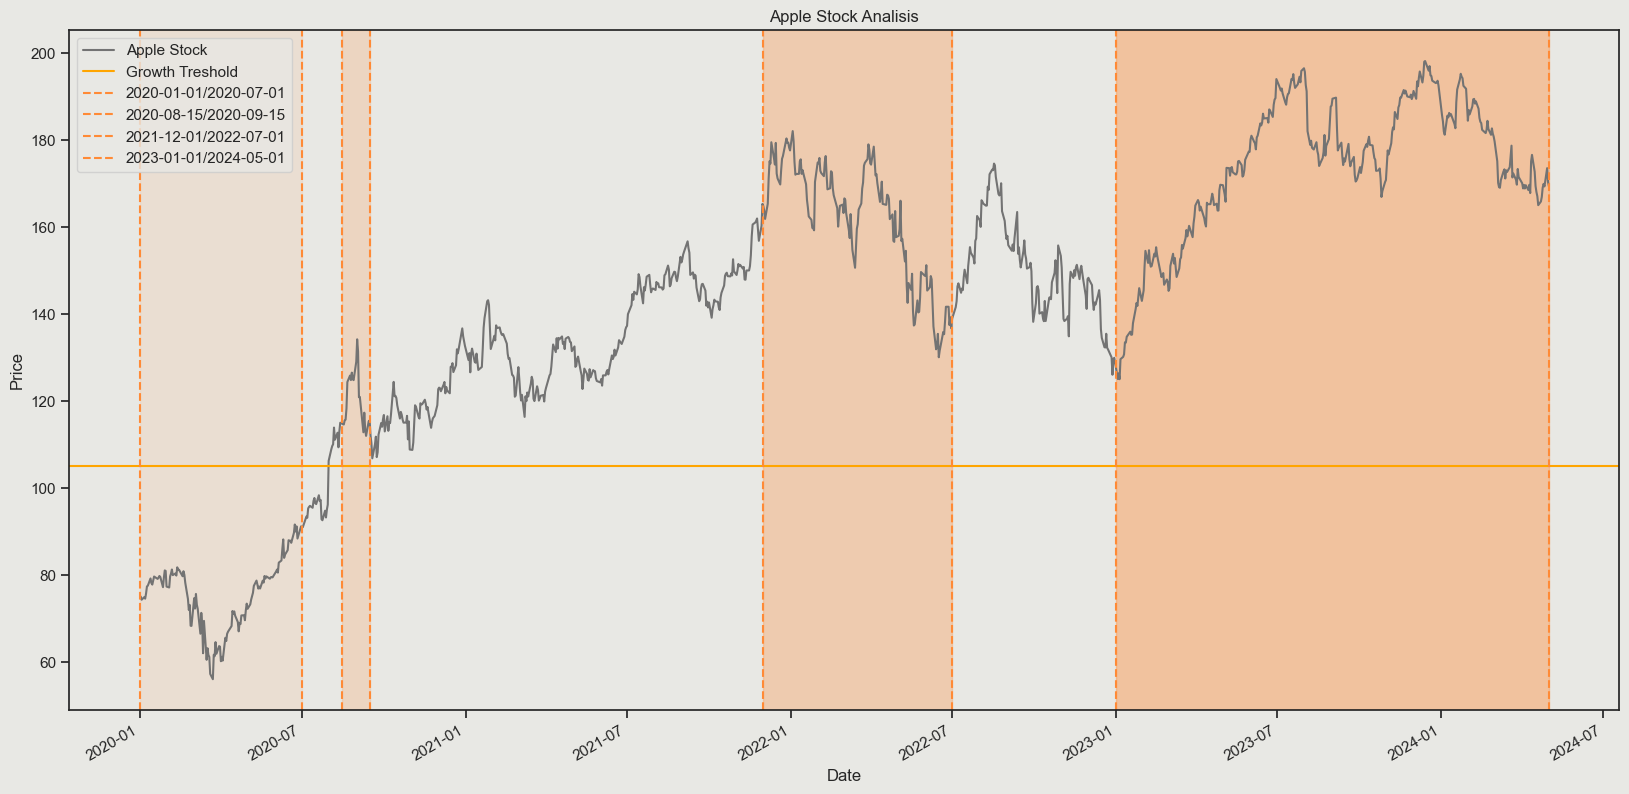

In [7]:

data["Value"].plot(figsize=(20,10),label="Apple Stock",color="#737373")
plt.axhline(y=105, color="orange", linestyle="-",label="Growth Treshold")

plt.axvline(x=pd.to_datetime("2020-01-01"),color="#FF8A36",linestyle="--",label="2020-01-01/2020-07-01")
plt.axvline(x=pd.to_datetime("2020-07-01"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2020-01-01"),pd.to_datetime("2020-07-01"),color="#FF8A36",alpha=0.1)


plt.axvline(x=pd.to_datetime("2020-08-15"),color="#FF8A36",linestyle="--",label="2020-08-15/2020-09-15")
plt.axvline(x=pd.to_datetime("2020-09-15"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2020-08-15"),pd.to_datetime("2020-09-15"),color="#FF8A36",alpha=0.2)

plt.axvline(x=pd.to_datetime("2021-12-01"),color="#FF8A36",linestyle="--",label="2021-12-01/2022-07-01")
plt.axvline(x=pd.to_datetime("2022-07-01"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2021-12-01"),pd.to_datetime("2022-07-01"),color="#FF8A36",alpha=0.3)

plt.axvline(x=pd.to_datetime("2023-01-01"),color="#FF8A36",linestyle="--",label="2023-01-01/2024-05-01")
plt.axvline(x=pd.to_datetime("2024-05-01"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2023-01-01"),pd.to_datetime("2024-05-01"),color="#FF8A36",alpha=0.4)


plt.title("Apple Stock Analisis")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")
plt.legend(facecolor="#E8E8E4")
plt.show()

- Analysis of increment/decrease per year

In [8]:
change_percentage =TimeConfig.time_change(df)
change_percentage.head()

,Value,Change
Date,,
2014,3816,0
2015,7562,98
2016,6590,-12
2017,9447,43
2018,11863,25


- Bars showing the change in the values over the years, clear measurements of performance

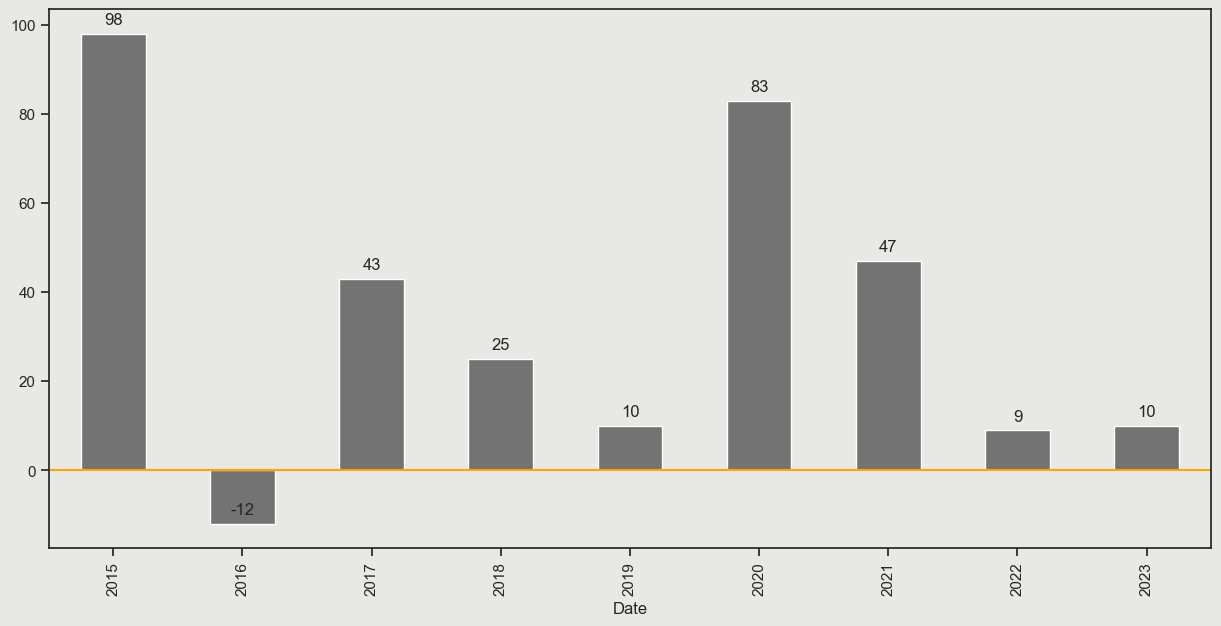

In [9]:
new= change_percentage.iloc[1:-1]
ax = new["Change"].plot.bar(figsize=(15,7), color="#737373", label="Growth per year")
plt.axhline(y=0,color="orange")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")

plt.show()

- Feature engineering to gather more information about trends and seasons

In [10]:
data= TimeConfig.time_features(data)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2020-01-02 to 2024-05-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Value         1090 non-null   float64
 1   year          1090 non-null   int32  
 2   month         1090 non-null   int32  
 3   day           1090 non-null   int32  
 4   day_of_week   1090 non-null   int32  
 5   day_of_year   1090 non-null   int32  
 6   week_of_year  1090 non-null   UInt32 
dtypes: UInt32(1), float64(1), int32(5)
memory usage: 75.9 KB


# Boxplots
- The use of boxplots is meant to see if there is any relationship between different years and find patterns
- The first exploration is going to be per year

2024-06-19 15:05:38,822,INFO,Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-19 15:05:38,829,INFO,Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


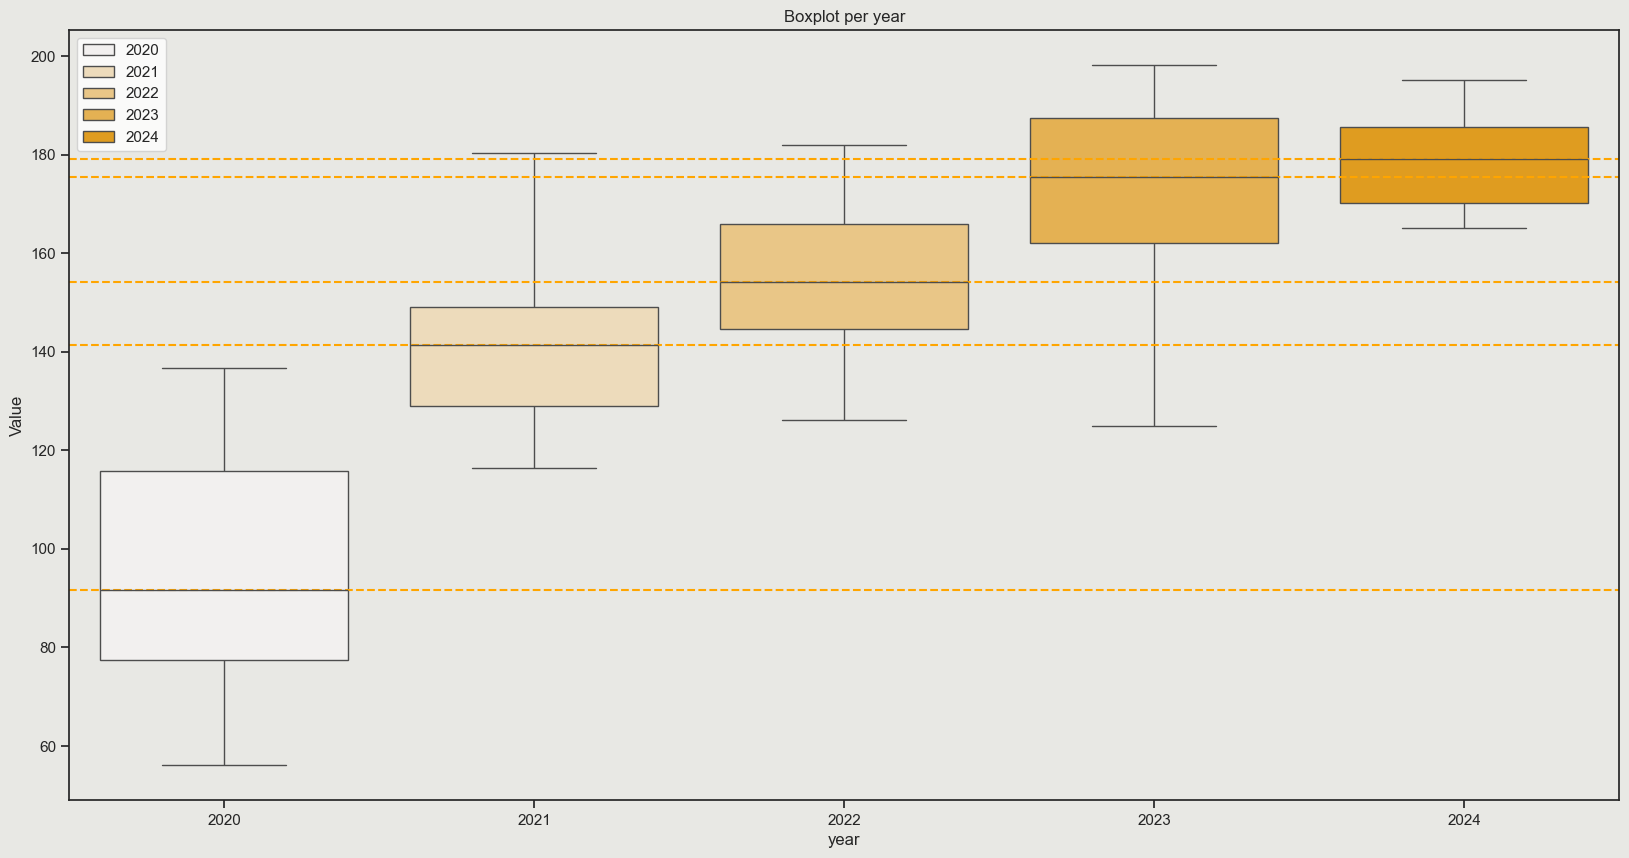

In [11]:
ig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=data, x="year", y="Value", ax=ax, palette="light:orange", hue='year', whis=(0, 100))
ax.set_title('Boxplot per year')
medians = data.groupby('year')['Value'].median()
for year, median_value in medians.items():
    plt.axhline(y=median_value, color='orange', linestyle='--')

plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")
plt.legend(loc='best')  
plt.show()

- Visualization of data per month for year 2023

2024-06-19 15:06:59,316,INFO,Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-19 15:06:59,320,INFO,Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


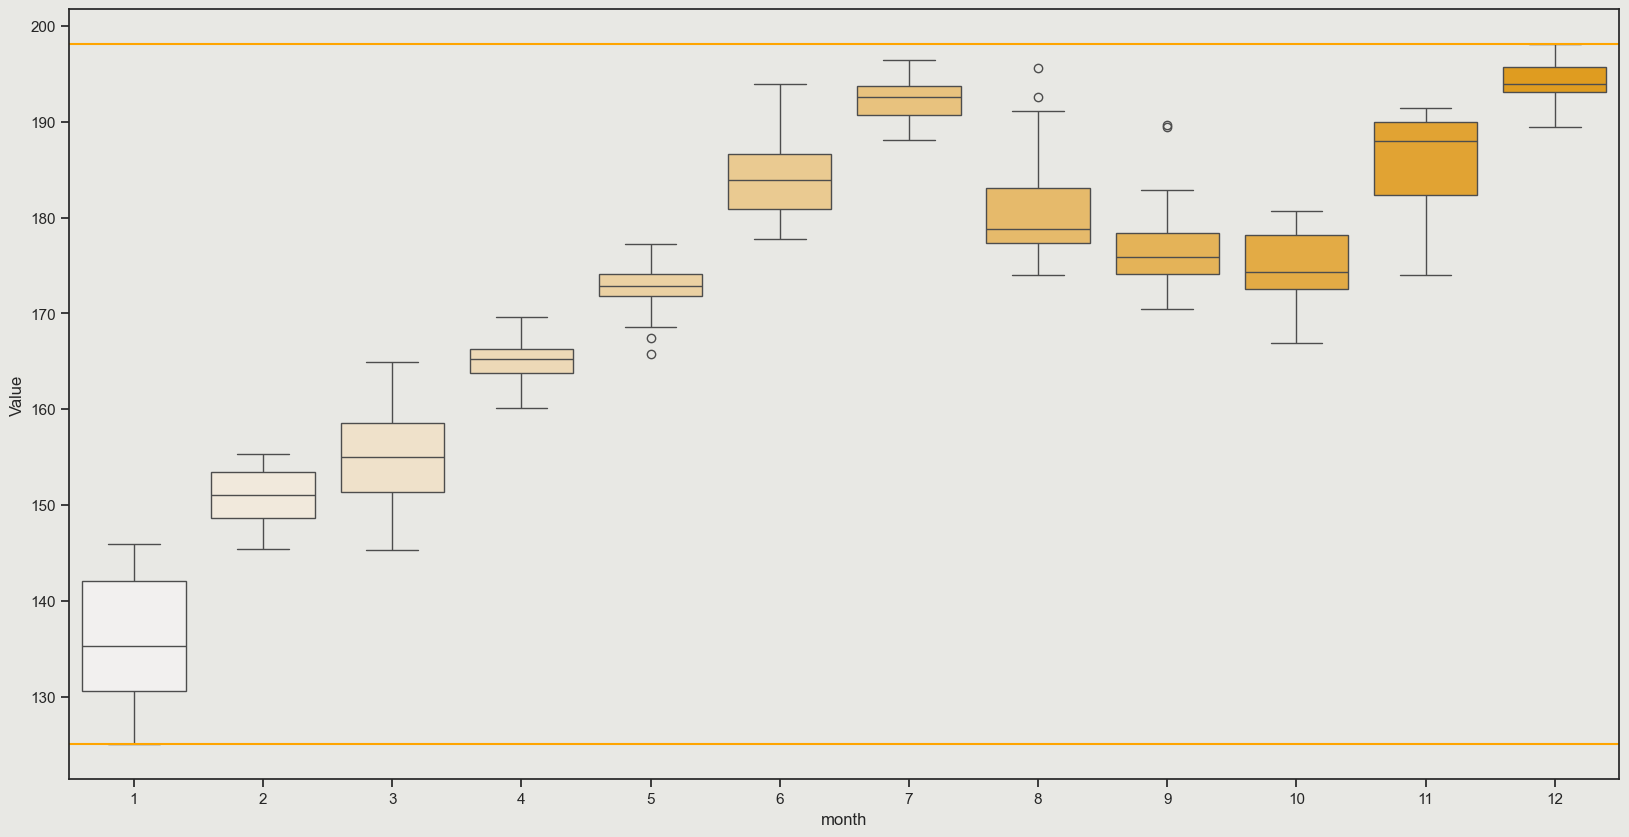

In [14]:
ig,ax= plt.subplots(figsize=(20,10))

sns.boxplot(data.loc['2023'], x='month',y='Value',ax=ax, palette='light:orange',hue='month',legend=False)
plt.axhline(y=data.loc['2023']["Value"].min(),color='orange')
plt.axhline(y=data.loc['2023']["Value"].max(),color='orange')
plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")
plt.show()

- There is no match of patterns between different years(2021,2022,2023)

2024-06-19 15:07:03,268,INFO,Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-19 15:07:03,274,INFO,Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


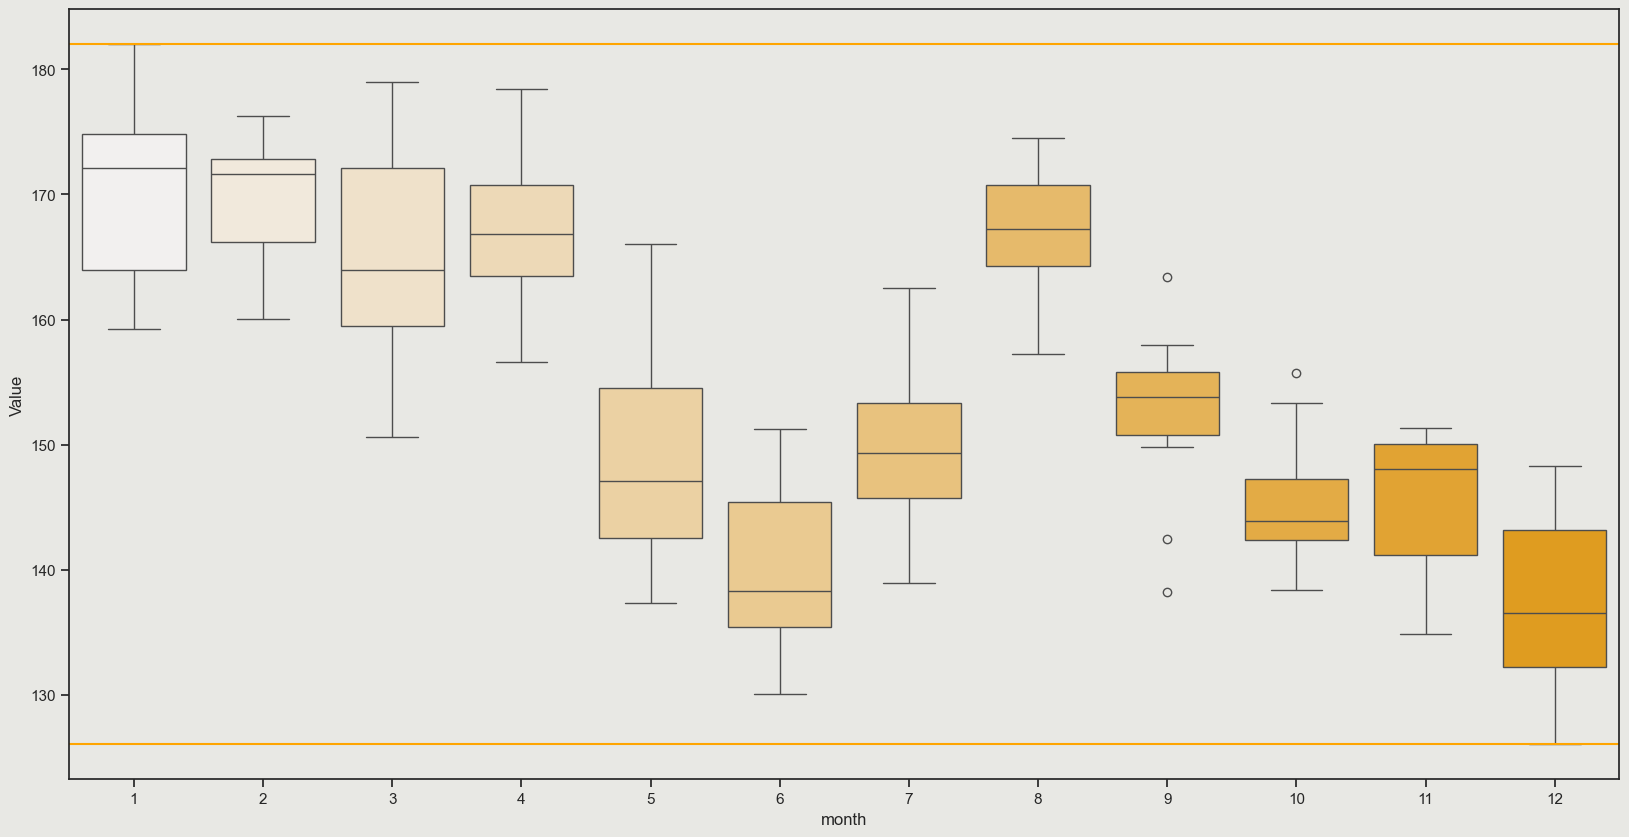

In [15]:
ig,ax= plt.subplots(figsize=(20,10))
sns.boxplot(data.loc['2022'], x='month',y='Value',ax=ax, palette='light:orange',hue='month',legend=False)
plt.axhline(y=data.loc['2022']["Value"].min(),color='orange')
plt.axhline(y=data.loc['2022']["Value"].max(),color='orange')
plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")
plt.show()

- There are some outliers in the data of 2021 and 2022, but they do not belong to the same period/season, there are no obvius patterns 

2024-06-19 15:07:05,912,INFO,Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-19 15:07:05,916,INFO,Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


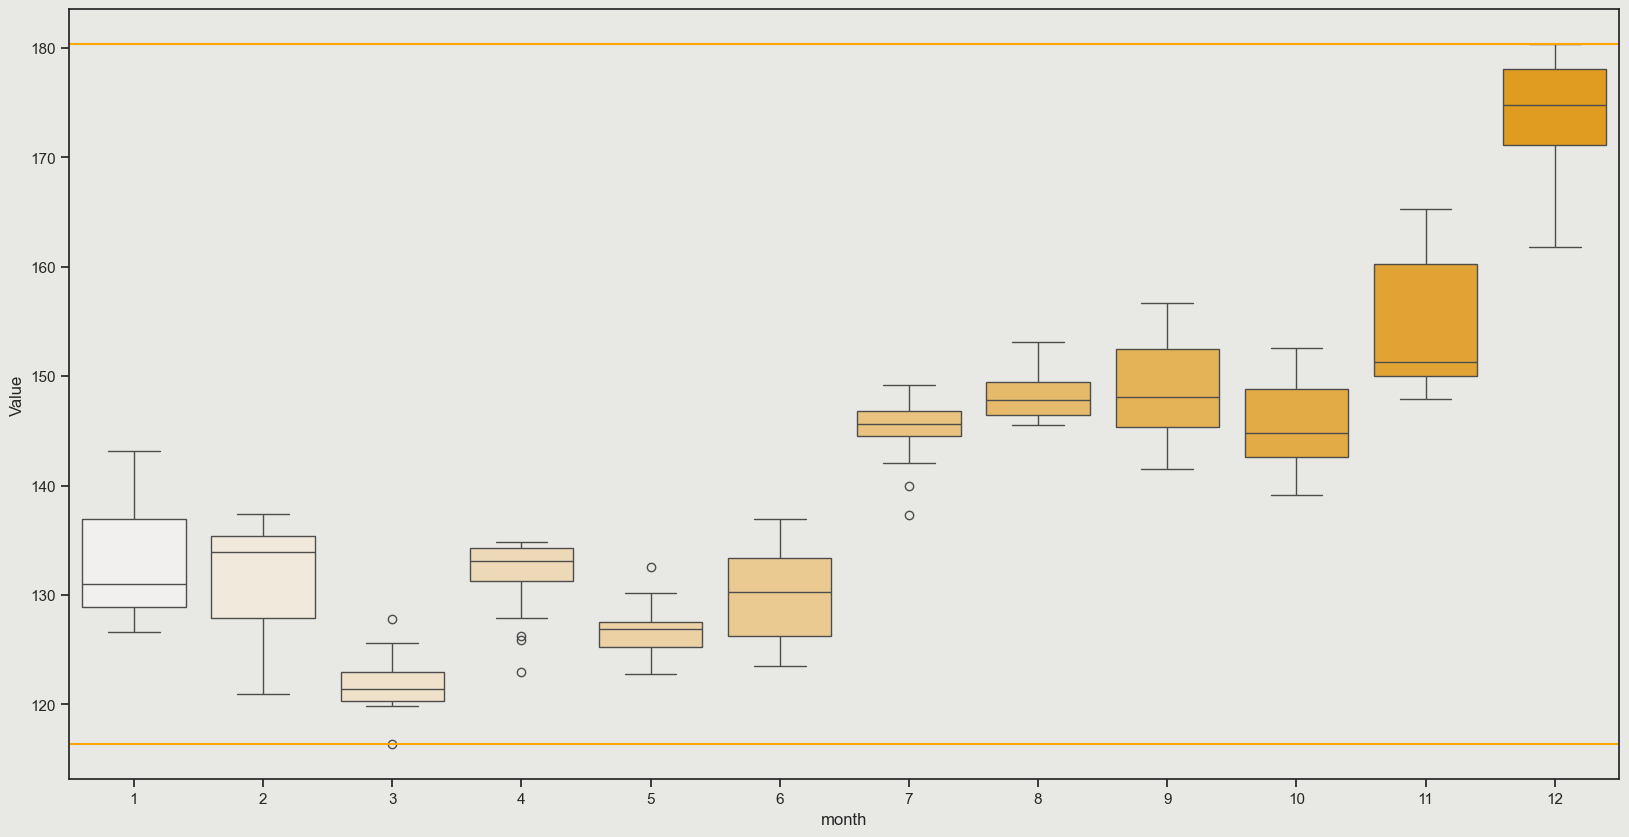

In [16]:
ig,ax= plt.subplots(figsize=(20,10))
sns.boxplot(data.loc['2021'], x='month',y='Value',ax=ax, palette='light:orange',hue='month',legend=False)
plt.axhline(y=data.loc['2021']["Value"].min(),color='orange')
plt.axhline(y=data.loc['2021']["Value"].max(),color='orange')
plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")
plt.show()

- This is just a mere visualization of the change of the data from one day to the other

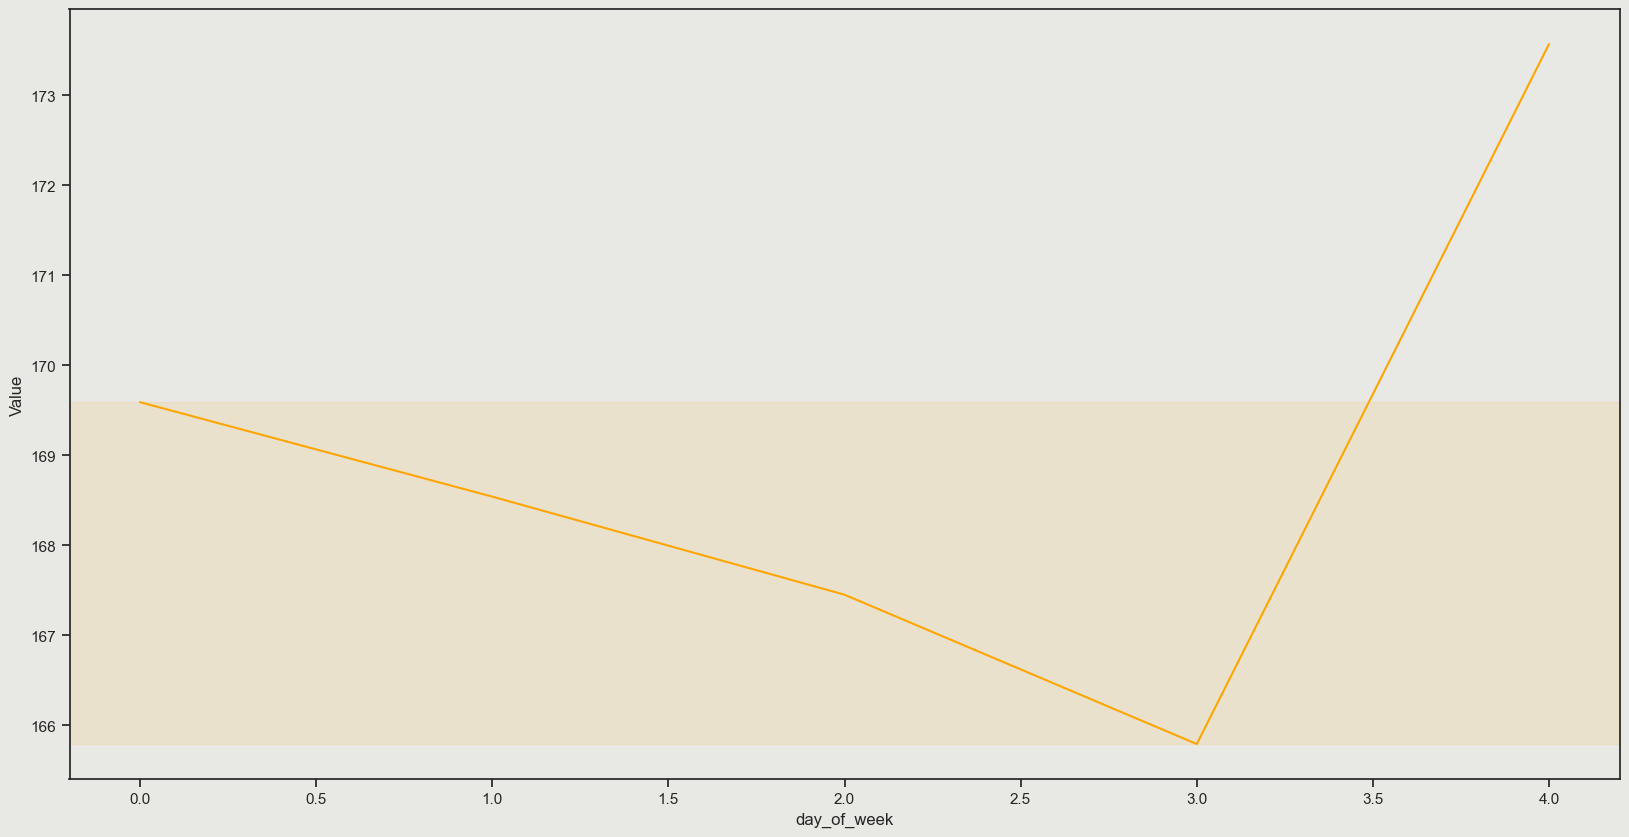

In [17]:
ig,ax= plt.subplots(figsize=(20,10))
sns.lineplot(data.loc['2023-05-01':'2023-05-07'], x='day_of_week',y='Value',ax=ax, color='orange')
plt.axhspan(ymax=float(data.loc['2023-05-01':'2023-05-07']['Value'].iloc[0]),ymin=float(data.loc['2023-05-01':'2023-05-07']['Value'].min()),color='orange',alpha=0.1)
plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")
plt.show()

- Comparing the data in a heatmap to see the magnitude of the values

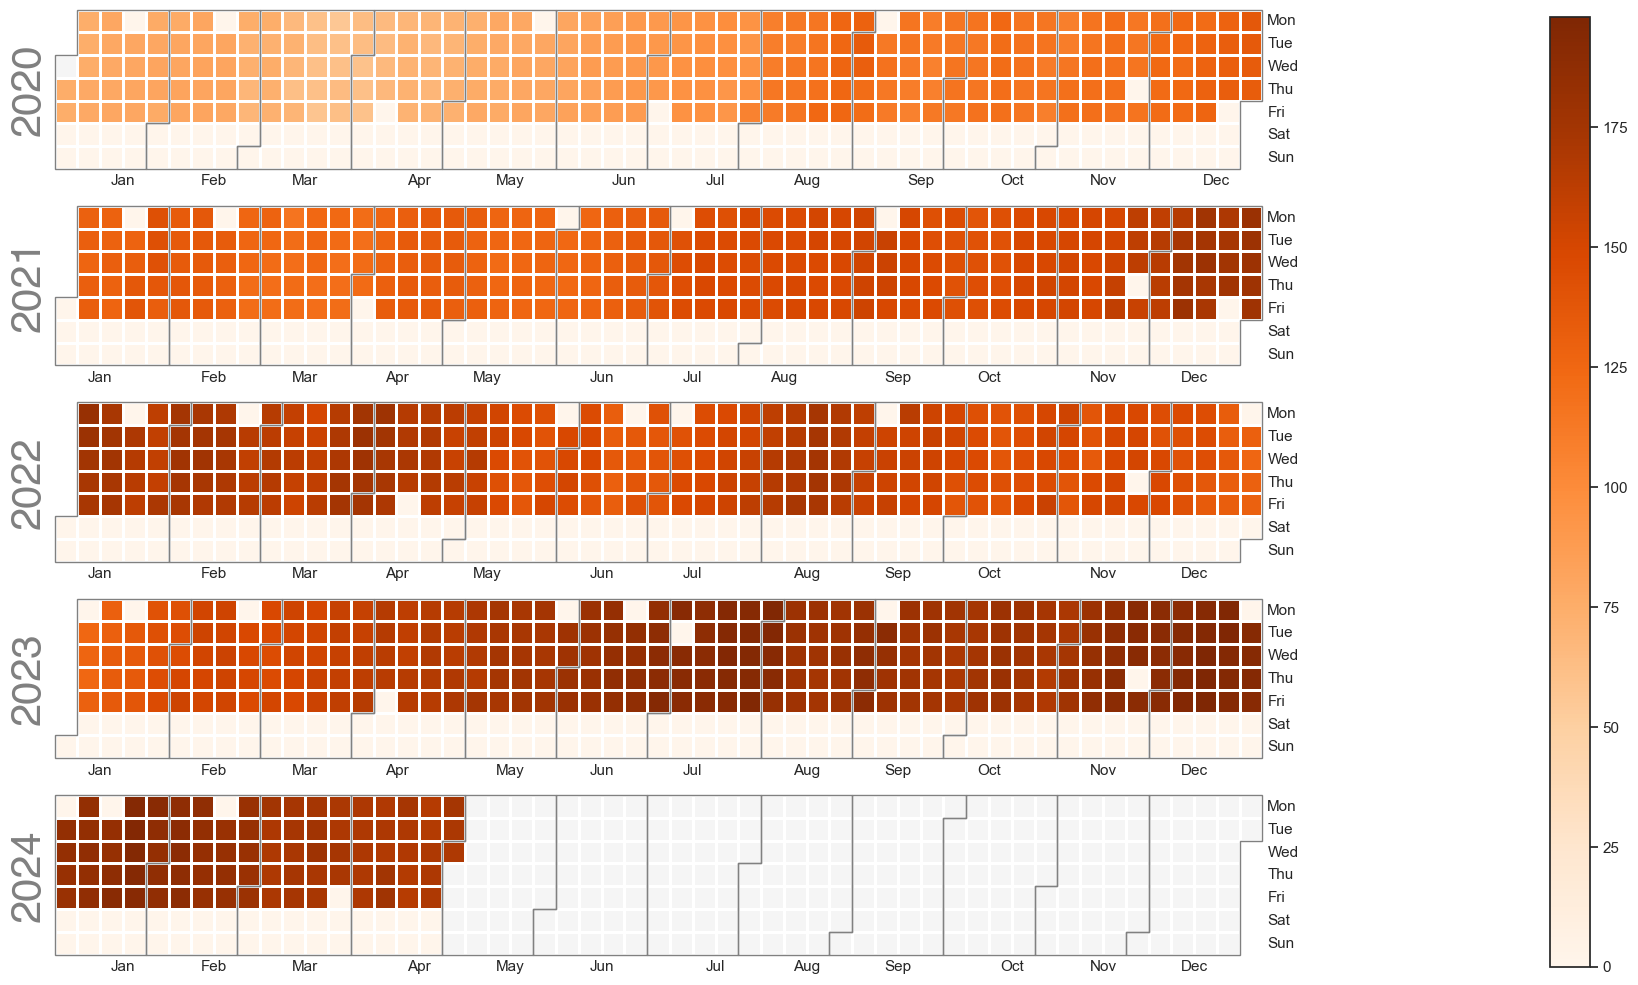

In [18]:
calplot.calplot(data['Value'],cmap='Oranges',colorbar=True,figsize=(20,10))
plt.gca().set_facecolor("#E8E8E4")
plt.show()

## Conclusions:
- 1: There is not any significant pattern that can garantee a trend in a specific season
    - the data was not scalated at any given point
- 2: The difference of the 'Value' magnitude its being increasing significantly over the last 10 years, the increase of this value belongs to an exogenic factor not included in this research
- 3: The difference on the scale of the data makes the comparison of patterns more difficult, that process is outside of this investigation

# Analysis with the opening Value
- Just for a matter of knowledge, the addition of the opening value is going to included in this visualization to see the effect of the bollinger bands analysis

In [41]:
df_open= pd.read_csv('../Data/apple.csv',sep=',',encoding='utf-8')                            # Reading the data
df_open= TimeConfig.time_transformation(df_open,['Close/Last','Open'])
df_open.head()

,Value,Open
Date,,
2014-05-30,22.6072,22.7850
2014-06-02,22.4518,22.6414
2014-06-03,22.7693,22.4450
2014-06-04,23.0293,22.7657
2014-06-05,23.1197,23.0786


In [42]:
df_open[['lower_band', 'mid', 'upper_band' ]] = ta.bbands(df_open.Value, length=2, std=2).iloc[:, :3]
df_open= df_open.loc['2023']

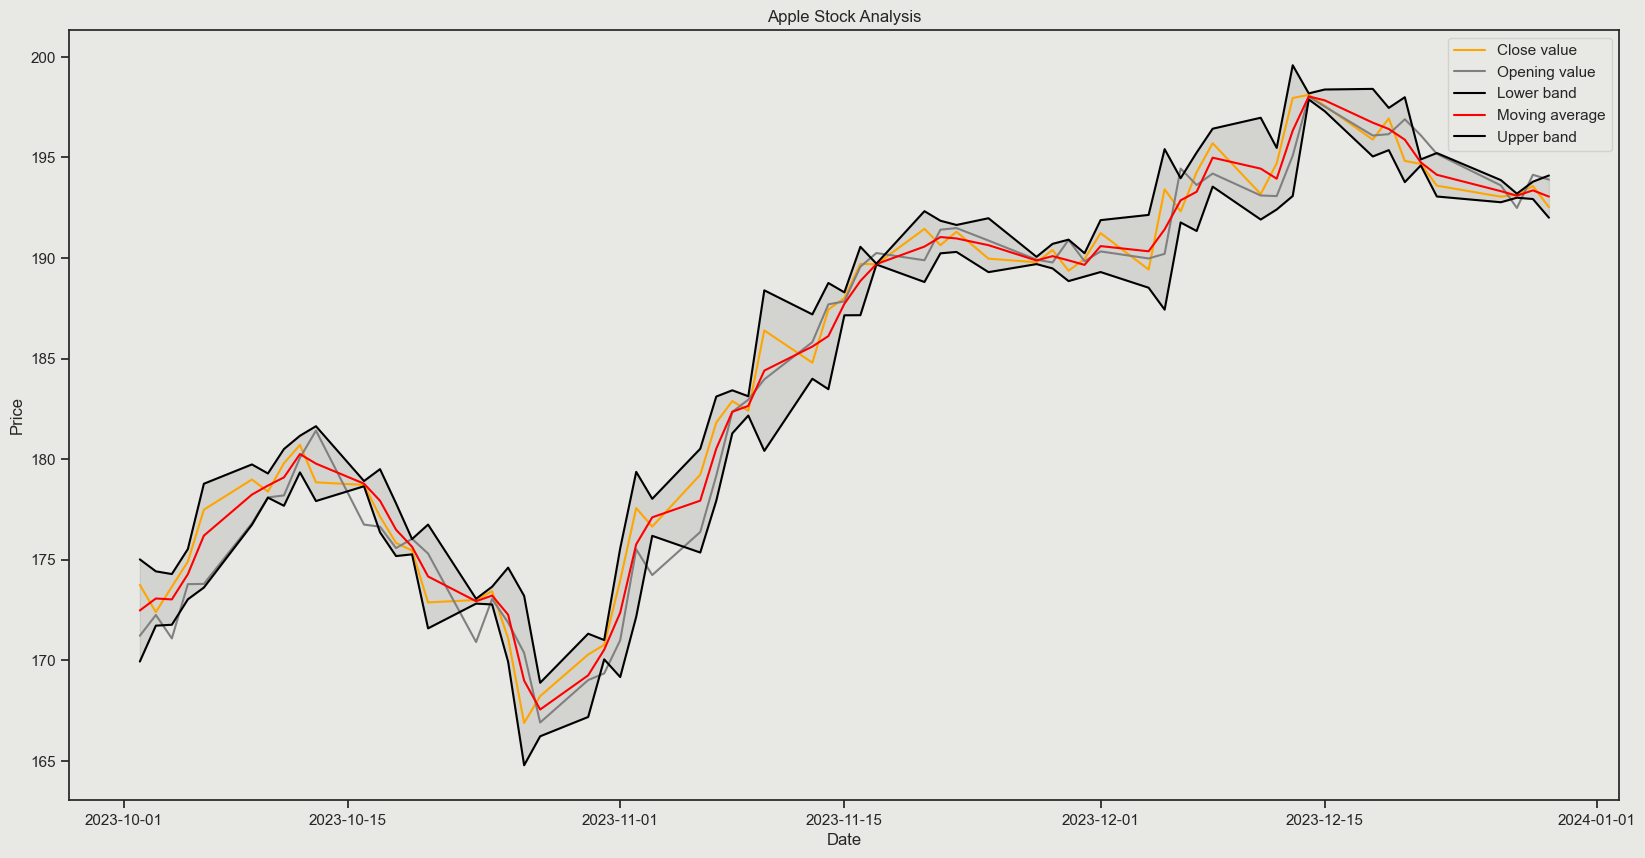

In [51]:
import matplotlib.pyplot as plt

start_date, end_date = "2023-10", "2023-12"

filtered_df = df_open.loc[start_date:end_date]

plt.figure(figsize=(20, 10))
plt.plot(filtered_df.index, filtered_df["Value"], label="Close value", color="orange")
plt.plot(filtered_df.index, filtered_df["Open"], label="Opening value", color="grey")
plt.plot(filtered_df.index, filtered_df["lower_band"], label="Lower band", color="black")
plt.plot(filtered_df.index, filtered_df["mid"], label="Moving average", color="red")
plt.plot(filtered_df.index, filtered_df["upper_band"], label="Upper band", color="black")

plt.fill_between(filtered_df.index, filtered_df["upper_band"], filtered_df["lower_band"], color='gray', alpha=0.2)

plt.title("Apple Stock Analysis")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")
plt.legend(facecolor="#E8E8E4")
plt.show()